In [1]:
import pandas as pd
my_data = pd.read_excel('D:\Capstone Project\San Francisco Incident Reports (2018-present)\Cleaned_Police_Department_Incident_Reports__2018_to_Present.xlsx')
import matplotlib.pyplot as plt


In [2]:
category_counts = my_data['Incident Category'].value_counts().nlargest(10)
subcategory_counts = my_data['Incident Subcategory'].value_counts().nlargest(10)

print("Top 10 Incident Categories:")
print(category_counts.to_string())

print("\nTop 10 Incident Subcategories:")
print(subcategory_counts.to_string())

Top 10 Incident Categories:
Larceny Theft          195029
Other Miscellaneous     48999
Malicious Mischief      45627
Assault                 42733
Non-Criminal            41283
Burglary                39249
Motor Vehicle Theft     35470
Fraud                   22050
Warrant                 20185
Recovered Vehicle       19871

Top 10 Incident Subcategories:
Larceny - From Vehicle    108622
Other                      87137
Vandalism                  45404
Larceny Theft - Other      43186
Motor Vehicle Theft        34923
Simple Assault             26612
Non-Criminal               23435
Fraud                      23072
Recovered Vehicle          19871
Drug Violation             17362


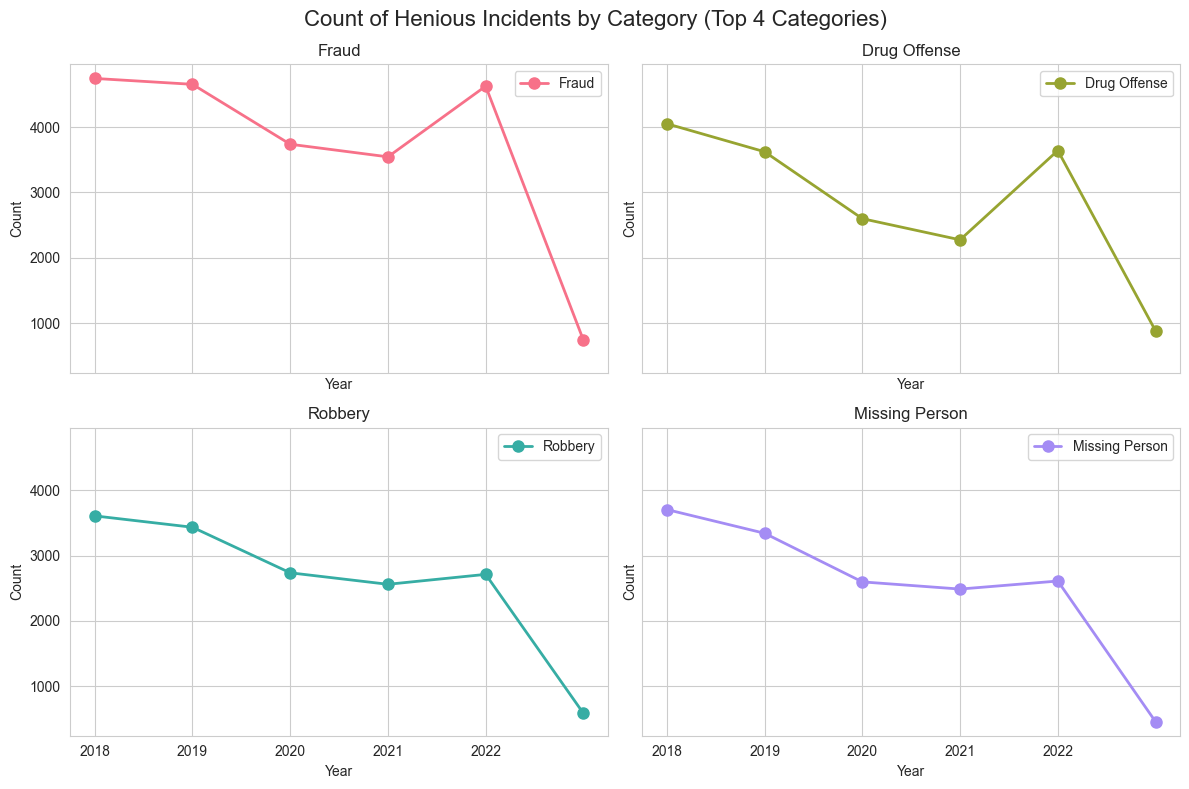

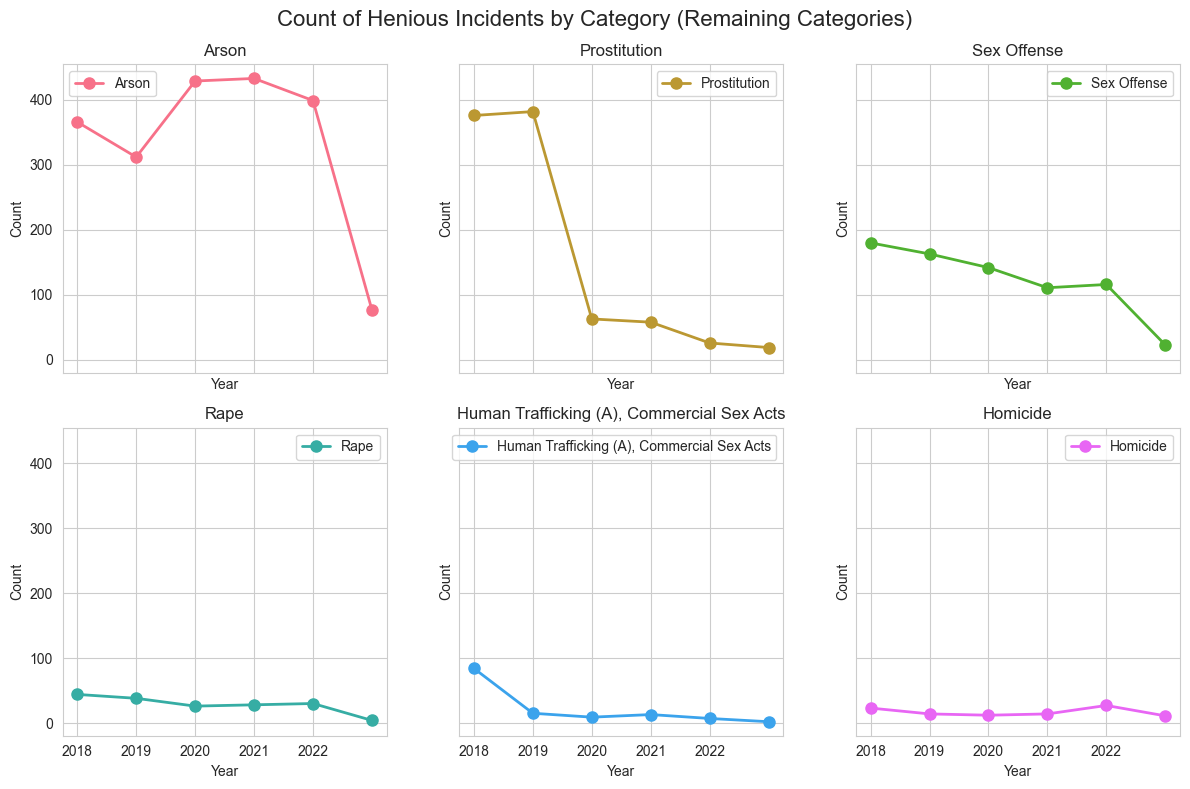

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter data by categories
categories_to_filter = ['Homicide', 'Rape', 'Arson', 'Fraud', 'Drug Offense', 'Robbery', 'Missing Person', 'Sex Offense','Prostitution', 'Human Trafficking (A), Commercial Sex Acts']
filtered_data = my_data[my_data['Incident Category'].isin(categories_to_filter)].copy()

category_data = {}

for category in categories_to_filter:
    category_data[category] = {'Years': [], 'Counts': []}

grouped_data = filtered_data.groupby(['Incident Category', 'Incident Year']).size().reset_index(name='Count')

for i, row in grouped_data.iterrows():
    category = row['Incident Category']
    year = row['Incident Year']
    count = row['Count']
    category_data[category]['Years'].append(year)
    category_data[category]['Counts'].append(count)

category_totals = {category: sum(category_data[category]['Counts']) for category in categories_to_filter}

sorted_categories = sorted(category_totals.keys(), key=lambda x: category_totals[x], reverse=True)

# Plot for top 4 categories
top_categories = sorted_categories[:4]
colors = sns.color_palette('husl', n_colors=len(top_categories))

sns.set_style('whitegrid')
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)
axes = axes.ravel()

for i, category in enumerate(top_categories):
    years = category_data[category]['Years']
    counts = category_data[category]['Counts']
    ax = axes[i]
    ax.plot(years, counts, label=category, color=colors[i], linewidth=2, marker='o', markersize=8)
    ax.set_title(category)
    ax.set_xlabel('Year')
    ax.set_ylabel('Count')
    ax.set_xticks(range(2018, 2023))
    ax.legend()

fig.suptitle('Count of Henious Incidents by Category (Top 4 Categories)', fontsize=16)
plt.tight_layout()
plt.show()

# Set up the figure and axes for remaining categories
remaining_categories = sorted_categories[4:]

sns.set_style('whitegrid')
fig, axes = plt.subplots(2, 3, figsize=(12, 8), sharex=True, sharey=True)
axes = axes.ravel()

colors = sns.color_palette('husl', n_colors=len(remaining_categories))

for i, category in enumerate(remaining_categories):
    years = category_data[category]['Years']
    counts = category_data[category]['Counts']
    ax = axes[i]
    ax.plot(years, counts, label=category, color=colors[i], linewidth=2, marker='o', markersize=8)
    ax.set_title(category)
    ax.set_xlabel('Year')
    ax.set_ylabel('Count')
    ax.set_xticks(range(2018, 2023))
    ax.legend()
fig.suptitle('Count of Henious Incidents by Category (Remaining Categories)', fontsize=16)
plt.tight_layout()
plt.show()


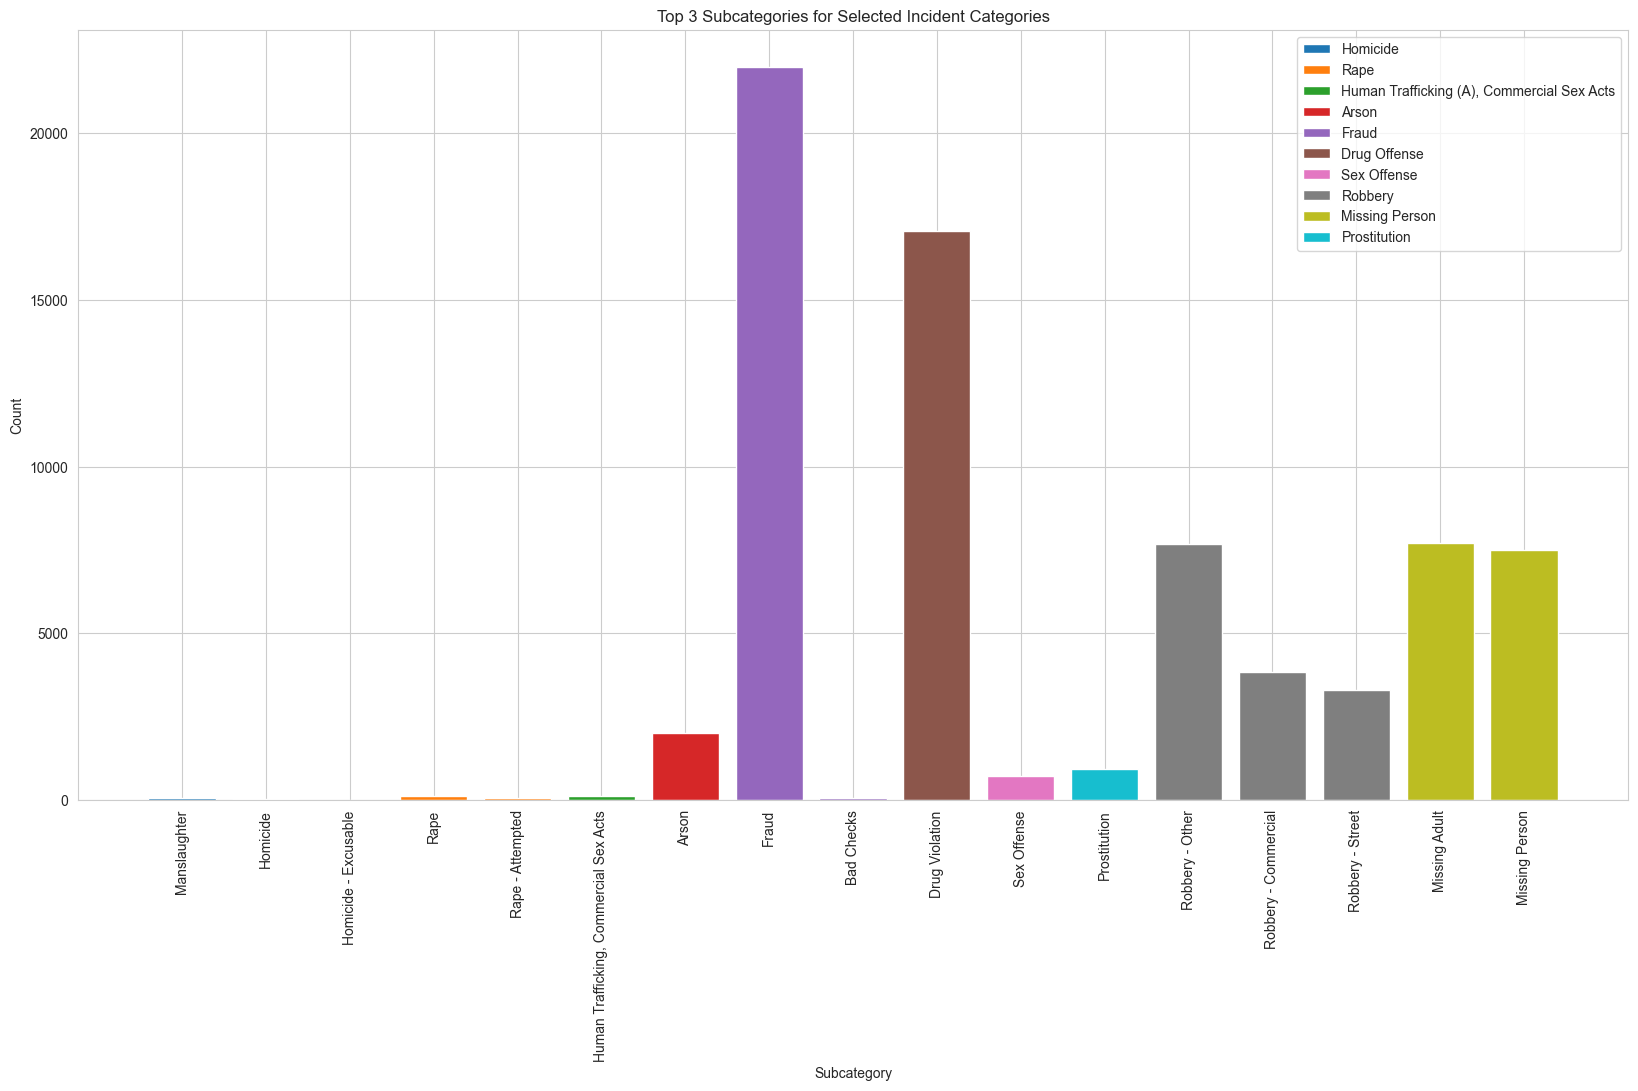

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for the desired categories
categories_to_filter = ['Homicide', 'Rape', 'Human Trafficking (A), Commercial Sex Acts', 'Arson', 'Fraud', 'Drug Offense','Sex Offense', 'Robbery', 'Missing Person', 'Prostitution']
grouped_data = my_data[my_data['Incident Category'].isin(categories_to_filter)].groupby(['Incident Category', 'Incident Subcategory']).size().reset_index(name='Count')

sorted_data = grouped_data.sort_values(['Incident Category', 'Count'], ascending=[True, False])

top3_subcategories = sorted_data.groupby('Incident Category').head(3)

filtered_subcategories = {}
for category in categories_to_filter:
    subcategories = top3_subcategories[top3_subcategories['Incident Category'] == category]
    subcategory_names = subcategories['Incident Subcategory'].tolist()
    subcategory_counts = subcategories['Count'].tolist()
    filtered_subcategories[category] = list(zip(subcategory_names, subcategory_counts))

# Generate merged histogram
plt.figure(figsize=(20, 10)) # Set the figure size
for category, subcategories in filtered_subcategories.items():
    subcategory_names = [subcategory[0] for subcategory in subcategories]
    subcategory_counts = [subcategory[1] for subcategory in subcategories]
    plt.bar(subcategory_names, subcategory_counts, label=category)
    plt.xticks(rotation='vertical') # Rotate x-axis labels vertically

plt.xlabel('Subcategory')
plt.ylabel('Count')
plt.title('Top 3 Subcategories for Selected Incident Categories')
plt.legend()
plt.show()


In [9]:
location_counts = my_data.groupby(['Latitude', 'Longitude']).size().reset_index(name='counts')
top_locations = location_counts.nlargest(10, 'counts')
print(location_counts.nlargest(10, 'counts'))


       Latitude   Longitude  counts
5183  37.784560 -122.407337    4093
4468  37.775161 -122.403635    3363
5312  37.786410 -122.408036    3325
5136  37.783933 -122.412595    3127
4747  37.778719 -122.414741    2788
988   37.726950 -122.476039    2728
3890  37.765051 -122.419669    2662
4349  37.773467 -122.391434    2506
4850  37.779992 -122.413487    2284
5176  37.784453 -122.408493    2241


In [41]:
import folium
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster

top_locations = location_counts.nlargest(10, 'counts')
heatmap_data = top_locations[['Latitude', 'Longitude', 'counts']].values.tolist()

sf_location = [37.7749, -122.4194]
map_sf = folium.Map(location=sf_location, zoom_start=12)

HeatMap(heatmap_data, min_opacity=0.2, radius=15, blur=10, max_zoom=1).add_to(map_sf)
for _, row in top_locations.iterrows():
    lat, lon, count = row['Latitude'], row['Longitude'], row['counts']
    tooltip = f"{count} reports at ({lat}, {lon})"
    folium.Marker([lat, lon], icon=folium.Icon(color='red'), tooltip=tooltip).add_to(map_sf)
    marker_cluster = FastMarkerCluster(top_locations[['Latitude', 'Longitude']].values.tolist())
    marker_cluster.add_to(map_sf) 
map_sf


In [42]:
import pandas as pd
import folium
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
categories_to_filter = ['Homicide', 'Rape', 'Human Trafficking (A), Commercial Sex Acts', 'Arson', 'Fraud', 'Drug Offense', 'Robbery', 'Missing Person', 'Prostitution']
filtered_data = my_data[my_data['Incident Category'].isin(categories_to_filter)]

heatmap_data = filtered_data[['Latitude', 'Longitude']].dropna().values.tolist()
location_counts = filtered_data.groupby(['Latitude', 'Longitude', 'Analysis Neighborhood']).size().reset_index(name='Counts') # Include 'Analysis Neighborhood' in groupby operation

sf_location = [37.7749, -122.4194]
map_sf = folium.Map(location=sf_location, zoom_start=12)

HeatMap(heatmap_data, min_opacity=0.2, radius=15, blur=10, max_zoom=1).add_to(map_sf)

marker_cluster = MarkerCluster().add_to(map_sf)
for _, row in location_counts.iterrows():
    lat, lon, counts = row['Latitude'], row['Longitude'], row['Counts']
    neighborhood = row['Analysis Neighborhood'] 
    tooltip = f"{counts} reports at ({lat}, {lon}), Neighborhood: {neighborhood}" 
    folium.Marker([lat, lon], tooltip=tooltip).add_to(marker_cluster)

map_sf



Analysis Neighborhood
Mission                           71276
Tenderloin                        68771
Financial District/South Beach    54446
South of Market                   54215
Bayview Hunters Point             44197
North Beach                       22581
Western Addition                  21591
Sunset/Parkside                   19992
Castro/Upper Market               19717
Nob Hill                          19177
Marina                            18936
Hayes Valley                      18294
Russian Hill                      16336
Outer Richmond                    15436
West of Twin Peaks                13390
Bernal Heights                    12479
Chinatown                         12446
Mission Bay                       12070
Pacific Heights                   11936
Potrero Hill                      11408
Excelsior                         11343
Haight Ashbury                    11139
Outer Mission                      9715
Inner Richmond                     9078
Inner Sunset      

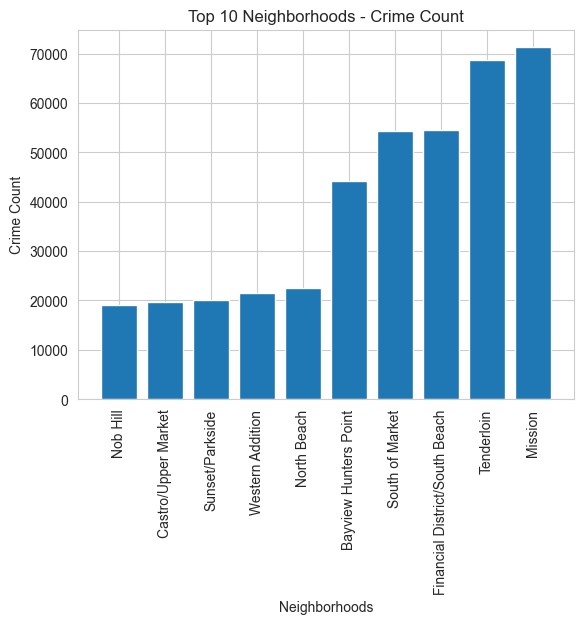

Neighborhoods: ['Mission', 'Tenderloin', 'Financial District/South Beach', 'South of Market', 'Bayview Hunters Point']


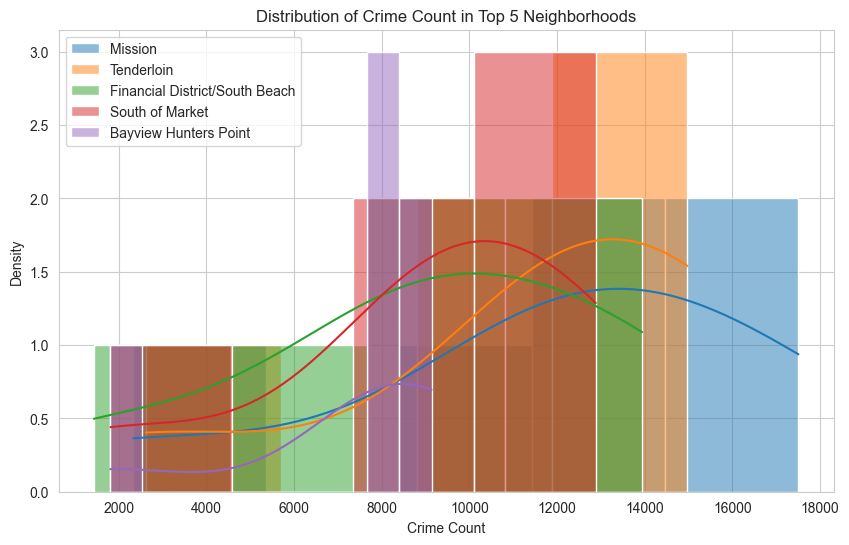

Neighborhood A: Mission
Neighborhood B: Tenderloin
T-statistic: 0.14709620307510143
P-value: 0.8860259984216026
Fail to reject the null hypothesis. There is no significant difference in crime rates between the top 2 neighborhoods.


In [45]:
########HYPOTHESIS TESTING
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

neighborhood_crime_counts = my_data.groupby(['Analysis Neighborhood', 'Incident Year'])['Incident ID'].count().reset_index()
neighborhood_crime_counts.rename(columns={'Incident ID': 'Crime Count'}, inplace=True)

sorted_neighborhoods = neighborhood_crime_counts.groupby('Analysis Neighborhood')['Crime Count'].sum().sort_values(ascending=False)
print(sorted_neighborhoods)
top_neighborhoods = sorted_neighborhoods.head(10).index.tolist()
sorted_neighborhoods_dsc = neighborhood_crime_counts[neighborhood_crime_counts['Analysis Neighborhood'].isin(top_neighborhoods)].groupby('Analysis Neighborhood')['Crime Count'].sum().sort_values(ascending=True)

plt.bar(sorted_neighborhoods_dsc.index, sorted_neighborhoods_dsc.values)
plt.xlabel('Neighborhoods')
plt.ylabel('Crime Count')
plt.title('Top 10 Neighborhoods - Crime Count')
plt.xticks(rotation=90)
plt.show()

top_neighborhoods = sorted_neighborhoods.head(5).index.tolist()
print('Neighborhoods:', top_neighborhoods)

sorted_neighborhoods_dsc = neighborhood_crime_counts[neighborhood_crime_counts['Analysis Neighborhood'].isin(top_neighborhoods)].groupby('Analysis Neighborhood')['Crime Count'].sum().sort_values(ascending=True)

top_neighborhoods = sorted_neighborhoods.head(5).index.tolist()
plt.figure(figsize=(10, 6))
for neighborhood in top_neighborhoods:
    sns.histplot(neighborhood_crime_counts[neighborhood_crime_counts['Analysis Neighborhood'] == neighborhood]['Crime Count'], label=neighborhood, kde=True)

plt.xlabel('Crime Count')
plt.ylabel('Density')
plt.title('Distribution of Crime Count in Top 5 Neighborhoods')
plt.legend()
plt.show()

# t-test between top 2 neighborhoods
top_neighborhoods = sorted_neighborhoods.head(2).index.tolist()

neighborhood_a = neighborhood_crime_counts[neighborhood_crime_counts['Analysis Neighborhood'] == top_neighborhoods[0]]
neighborhood_b = neighborhood_crime_counts[neighborhood_crime_counts['Analysis Neighborhood'] == top_neighborhoods[1]]

t_stat, p_value = stats.ttest_ind(neighborhood_a['Crime Count'], neighborhood_b['Crime Count'], equal_var=False)

alpha = 0.05

print('Neighborhood A:', top_neighborhoods[0])
print('Neighborhood B:', top_neighborhoods[1])
print('T-statistic:', t_stat)
print('P-value:', p_value)

if p_value < alpha:
    print('Reject the null hypothesis. There is a significant difference in crime rates between the top 2 neighborhoods.')
else:
    print('Fail to reject the null hypothesis. There is no significant difference in crime rates between the top 2 neighborhoods.')



C:\Users\FATTANI COMPUTERS\AppData\Local\Temp\ipykernel_16372\3790401153.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


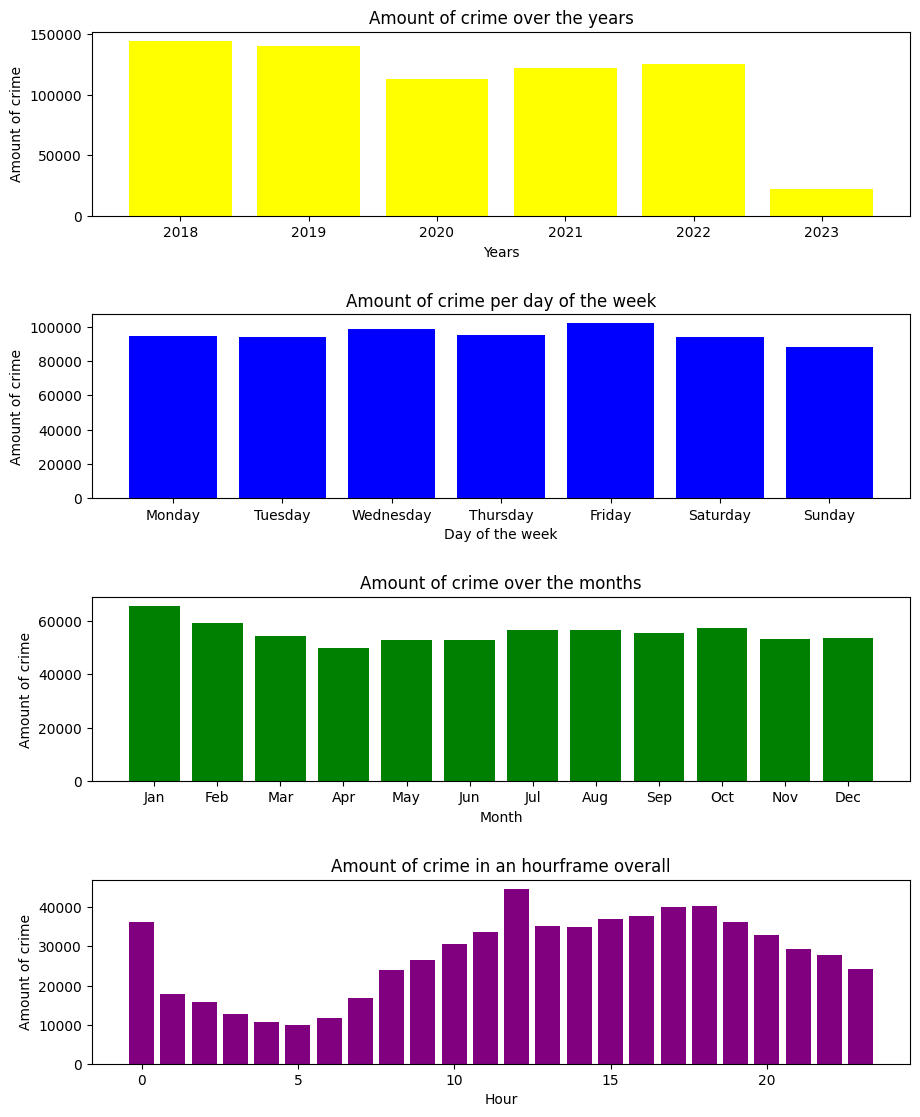

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

my_data['Incident Datetime'] = pd.to_datetime(my_data['Incident Datetime'])

my_data['year'] = my_data['Incident Datetime'].dt.year
my_data['day_of_week'] = my_data['Incident Datetime'].dt.day_name()
my_data['month'] = my_data['Incident Datetime'].dt.month_name()
my_data['hour'] = my_data['Incident Datetime'].dt.hour
my_data['minute'] = my_data['Incident Datetime'].dt.minute

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 12))
fig.tight_layout(pad=5.0)

count = Counter(my_data['year'])
ax1.bar(count.keys(), count.values(), color='yellow')
ax1.set_title('Amount of crime over the years')
ax1.set_ylabel('Amount of crime')
ax1.set_xlabel('Years')

count = Counter(my_data['day_of_week'])
ax2.bar(count.keys(), count.values(), color='blue')
ax2.set_title('Amount of crime per day of the week')
ax2.set_ylabel('Amount of crime')
ax2.set_xlabel('Day of the week')

count = Counter(my_data['month'])
ax3.bar(count.keys(), count.values(), color='green')
ax3.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax3.set_title('Amount of crime over the months')
ax3.set_ylabel('Amount of crime')
ax3.set_xlabel('Month')

count = Counter(my_data['hour'])
ax4.bar(count.keys(), count.values(), color='purple')
ax4.set_title('Amount of crime in an hourframe overall')
ax4.set_ylabel('Amount of crime')
ax4.set_xlabel('Hour')

plt.show()


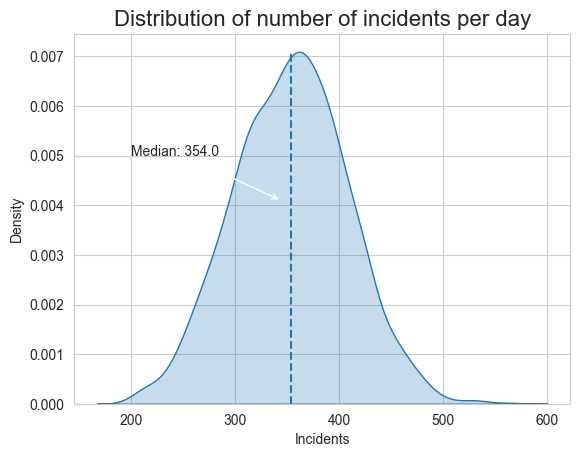

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

my_data['Incident Datetime'] = pd.to_datetime(my_data['Incident Datetime'])

incidents_per_day = my_data.groupby(my_data['Incident Datetime'].dt.date).count()['Incident Datetime']

sns.kdeplot(data=incidents_per_day, fill=True)
plt.axvline(x=incidents_per_day.median(), ymax=0.95, linestyle='--')
plt.annotate(
    'Median: ' + str(incidents_per_day.median()),
    xy=(incidents_per_day.median(), 0.004),
    xytext=(200, 0.005),
    arrowprops=dict(arrowstyle='->', shrinkB=10))
plt.title('Distribution of number of incidents per day', fontsize=16)
plt.xlabel('Incidents')
plt.ylabel('Density')
plt.show()


Percentage of Resolutions:
 Open or Active          0.791195
Cite or Arrest Adult    0.200483
Unfounded               0.005582
Exceptional Adult       0.002741
Name: Resolution, dtype: float64


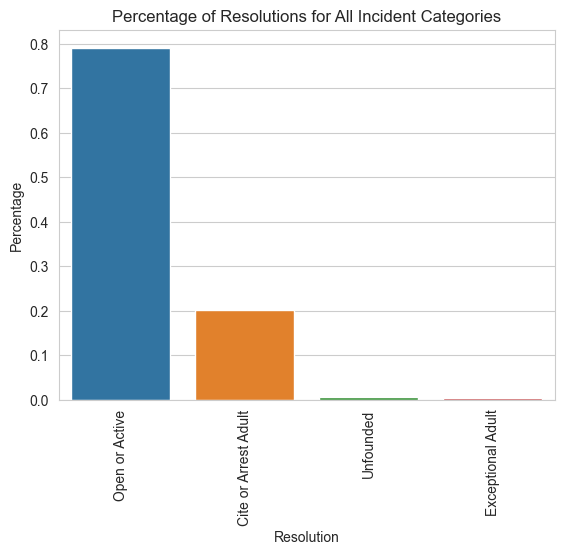

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

resolution_percentage = my_data['Resolution'].value_counts(normalize=True)
print("Percentage of Resolutions:\n", resolution_percentage)

sns.barplot(x=resolution_percentage.index, y=resolution_percentage.values)
plt.xlabel('Resolution')
plt.ylabel('Percentage')
plt.title('Percentage of Resolutions for All Incident Categories')
plt.xticks(rotation=90)
plt.show()


<Figure size 2000x600 with 0 Axes>

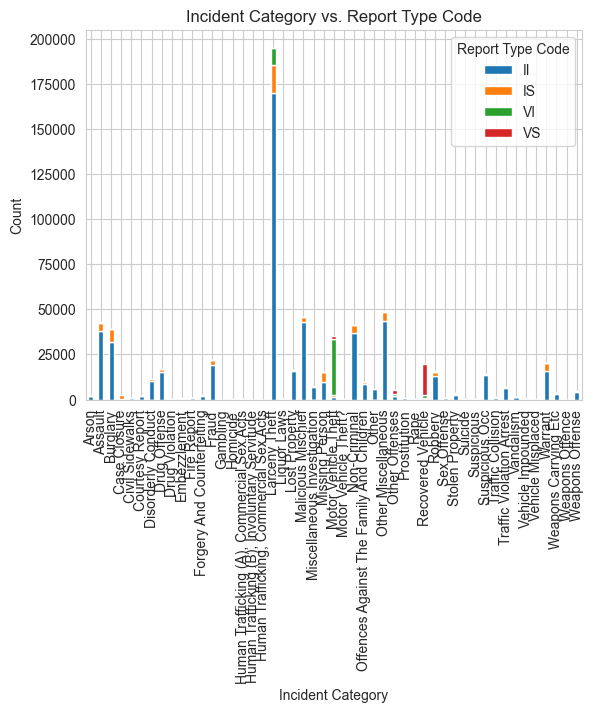

<Figure size 2000x600 with 0 Axes>

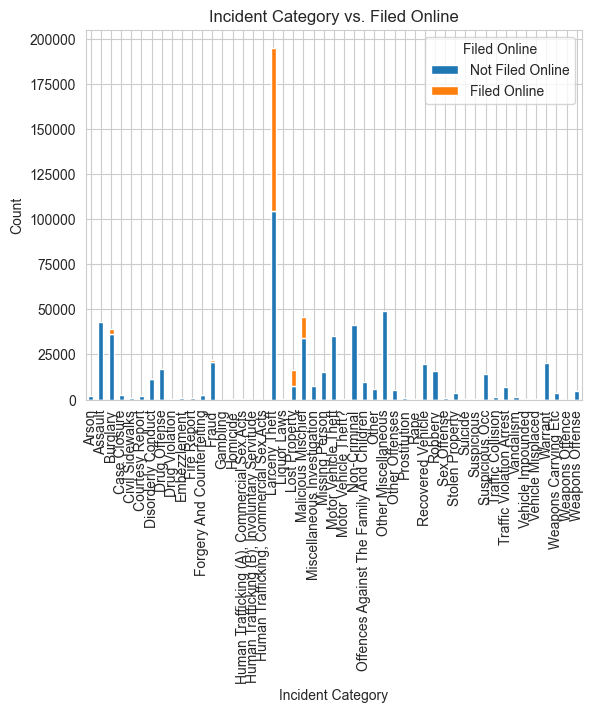

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

my_data['Filed Online'] = my_data['Filed Online'].fillna(False)
my_data['Filed Online'] = my_data['Filed Online'].replace('TRUE', True)

#cross-tabulation analysis between Incident Category and Report Type Code
incident_category_report_type_cross_tab = pd.crosstab(my_data['Incident Category'], my_data['Report Type Code'])

# analysis between Incident Category and Filed Online
incident_category_filed_online_cross_tab = pd.crosstab(my_data['Incident Category'], my_data['Filed Online'], dropna=False)


plt.figure(figsize=(20, 6))
incident_category_report_type_cross_tab.plot(kind='bar', stacked=True)
plt.title("Incident Category vs. Report Type Code")
plt.xlabel("Incident Category")
plt.ylabel("Count")
plt.legend(title="Report Type Code")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 6))
incident_category_filed_online_cross_tab.plot(kind='bar', stacked=True)
plt.title("Incident Category vs. Filed Online")
plt.xlabel("Incident Category")
plt.ylabel("Count")
plt.legend(title="Filed Online", labels=["Not Filed Online", "Filed Online"])  # Add custom labels for legend
plt.xticks(rotation=90)
plt.show()


Weekdays Mean Response Time (min): 12825.85809188274
Weekends Mean Response Time (min): 11287.231667026192
T-statistic: 6.558275710464447
P-value: 5.4474337371819556e-11
Null hypothesis rejected. There is a significant difference in response times between weekdays and weekends.


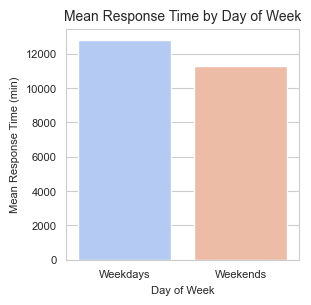

In [48]:
import pandas as pd
import numpy as np
from scipy import stats
# to find significant difference in response time in weekdays and weekends!
my_data['Incident Datetime'] = pd.to_datetime(my_data['Incident Datetime'])
my_data['Incident Date'] = pd.to_datetime(my_data['Incident Date'])
my_data['Report Datetime'] = pd.to_datetime(my_data['Report Datetime'])

my_data['Incident Day of Week'] = my_data['Incident Datetime'].dt.strftime('%A')

weekdays_data = my_data[my_data['Incident Day of Week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])].copy()
weekends_data = my_data[my_data['Incident Day of Week'].isin(['Saturday', 'Sunday'])].copy()

weekdays_data.loc[:, 'Response Time (min)'] = (weekdays_data['Report Datetime'] - weekdays_data['Incident Datetime']).dt.total_seconds() / 60
weekends_data.loc[:, 'Response Time (min)'] = (weekends_data['Report Datetime'] - weekends_data['Incident Datetime']).dt.total_seconds() / 60

weekdays_response_time = weekdays_data['Response Time (min)'].dropna()
weekends_response_time = weekends_data['Response Time (min)'].dropna()

# t-test
t_stat, p_value = stats.ttest_ind(weekdays_response_time, weekends_response_time)

print('Weekdays Mean Response Time (min):', weekdays_response_time.mean())
print('Weekends Mean Response Time (min):', weekends_response_time.mean())
print('T-statistic:', t_stat)
print('P-value:', p_value)
alpha = 0.05
if p_value < alpha:
    print("Null hypothesis rejected. There is a significant difference in response times between weekdays and weekends.")
else:
    print("Null hypothesis not rejected. There is no significant difference in response times between weekdays and weekends.")

import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette('coolwarm', n_colors=2)  
bar_colors = colors.as_hex()  

weekdays_mean = weekdays_response_time.mean()
weekends_mean = weekends_response_time.mean()

plt.figure(figsize=(3, 3))

sns.barplot(x=['Weekdays', 'Weekends'], y=[weekdays_mean, weekends_mean], palette=bar_colors)

plt.title('Mean Response Time by Day of Week', fontsize=10)
plt.xlabel('Day of Week', fontsize=8)
plt.ylabel('Mean Response Time (min)', fontsize=8)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylim(0)  
plt.show()


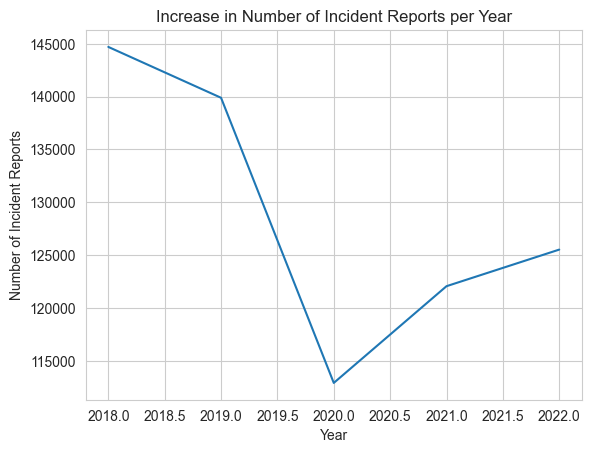

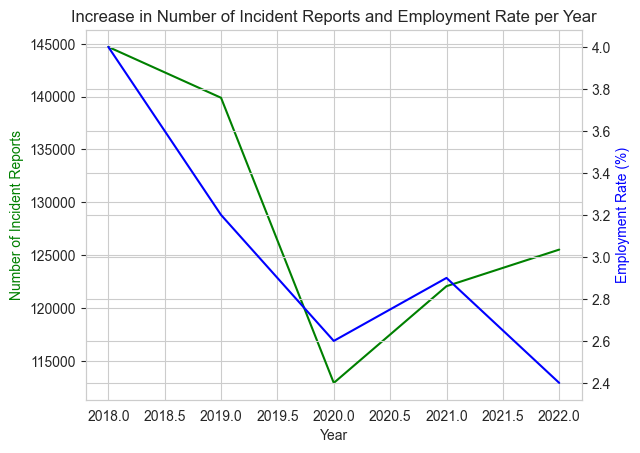

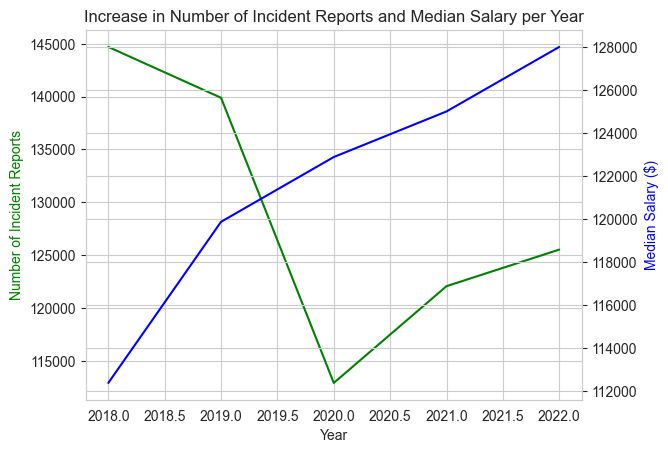

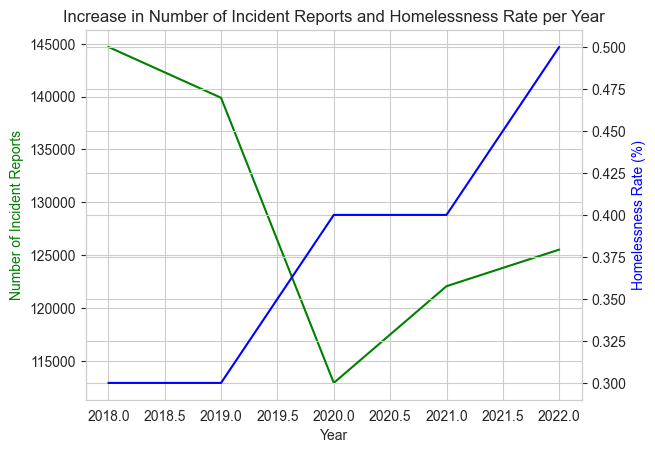

<function matplotlib.pyplot.show(close=None, block=None)>

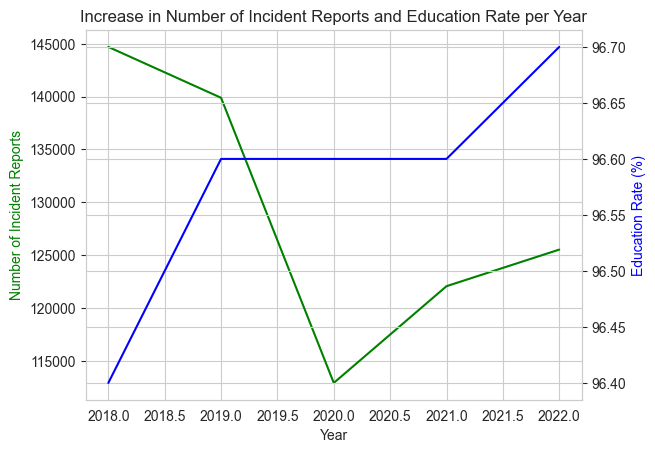

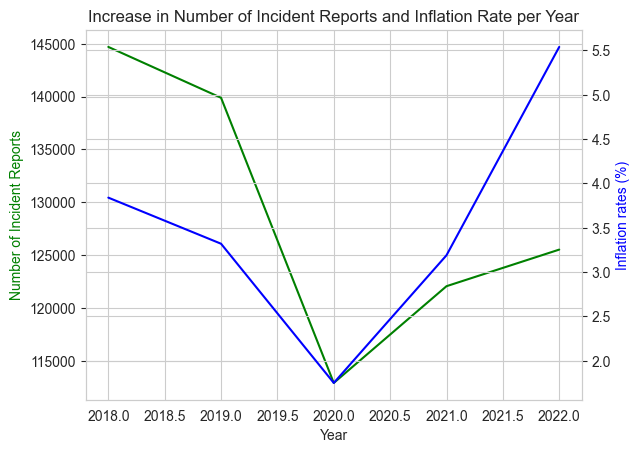

In [46]:
my_data['year'] = my_data['Incident Datetime'].dt.year
my_data = my_data[my_data['year'] != 2023]
yearly_counts = my_data.groupby('year')['Incident Code'].count()
plt.plot(yearly_counts.index, yearly_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Incident Reports')
plt.title('Increase in Number of Incident Reports per Year')
plt.show()

yearly_counts = my_data.groupby('year')['Incident Code'].count()
years = [2018, 2019, 2020, 2021, 2022]
employment_rates = [4.0, 3.2, 2.6, 2.9, 2.4]
median_salaries = [112376, 119868, 122880, 125000, 128000]
homelessness_rates = [0.3, 0.3, 0.4, 0.4, 0.5]
education_rates = [96.4, 96.6, 96.6, 96.6, 96.7]
inflation_rates = [3.84, 3.32, 1.75, 3.19, 5.54]
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(yearly_counts.index, yearly_counts.values, 'g-')
ax2.plot(years, employment_rates, 'b-')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Incident Reports', color='g')
ax2.set_ylabel('Employment Rate (%)', color='b')
ax1.set_title('Increase in Number of Incident Reports and Employment Rate per Year')
plt.show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(yearly_counts.index, yearly_counts.values, 'g-')
ax2.plot(years, median_salaries, 'b-')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Incident Reports', color='g')
ax2.set_ylabel('Median Salary ($)', color='b')
ax1.set_title('Increase in Number of Incident Reports and Median Salary per Year')
plt.show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(yearly_counts.index, yearly_counts.values, 'g-')
ax2.plot(years, homelessness_rates, 'b-')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Incident Reports', color='g')
ax2.set_ylabel('Homelessness Rate (%)', color='b')
ax1.set_title('Increase in Number of Incident Reports and Homelessness Rate per Year')
plt.show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(yearly_counts.index, yearly_counts.values, 'g-')
ax2.plot(years, education_rates, 'b-')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Incident Reports', color='g')
ax2.set_ylabel('Education Rate (%)', color='b')
ax1.set_title('Increase in Number of Incident Reports and Education Rate per Year')
plt.show

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(yearly_counts.index, yearly_counts.values, 'g-')
ax2.plot(years, inflation_rates, 'b-')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Incident Reports', color='g')
ax2.set_ylabel('Inflation rates (%)', color='b')
ax1.set_title('Increase in Number of Incident Reports and Inflation Rate per Year')
plt.show


                     Longitude  Latitude  Supervisor District
Longitude             1.000000  0.152870             0.320349
Latitude              0.152870  1.000000            -0.765311
Supervisor District   0.320349 -0.765311             1.000000


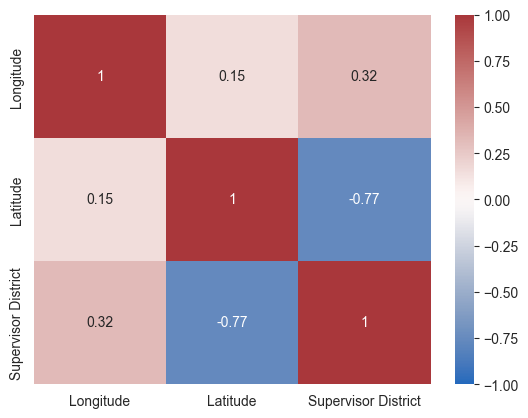

In [33]:
import pandas as pd
import seaborn as sns

# select the columns to use for the correlation matrix
cols_to_use = ['Longitude', 'Latitude', 'Supervisor District']

# compute the correlation matrix
corr_mat = my_data[cols_to_use].corr()

# plot the heatmap
cmap = sns.color_palette("vlag", as_cmap=True)
sns.heatmap(corr_mat, cmap=cmap, vmin=-1, vmax=1, annot=True)
print(corr_mat)
